In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/USArrests.csv',index_col=0)

In [3]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
data.columns


Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
data.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [6]:
from sklearn.cluster import KMeans

In [7]:
x=data[['Murder','Assault','UrbanPop','Rape']]

In [8]:
wc=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10,init='k-means++')
  km.fit(x)
  css=km.inertia_
  wc.append(css)

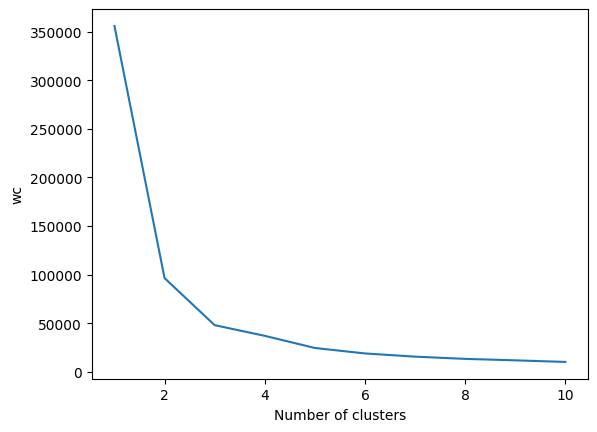

In [9]:
plt.plot(range(1,11),wc)
plt.xlabel("Number of clusters")
plt.ylabel("wc")
plt.show()

In [10]:
km=KMeans(n_clusters=3,n_init=10)

In [11]:
km.fit(x)

KMeans(n_clusters=3, n_init=10)

In [12]:
cluster_labels=km.predict(x)

In [13]:
print(cluster_labels)

[0 0 0 2 0 2 1 0 0 2 1 1 0 1 1 1 1 0 1 0 2 0 1 0 2 1 1 0 1 2 0 0 0 1 1 2 2
 1 2 0 1 2 2 1 1 2 2 1 1 2]


In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_avg1=silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.5319024108339817


In [16]:
pd.Series(cluster_labels).value_counts()

1    20
0    16
2    14
dtype: int64

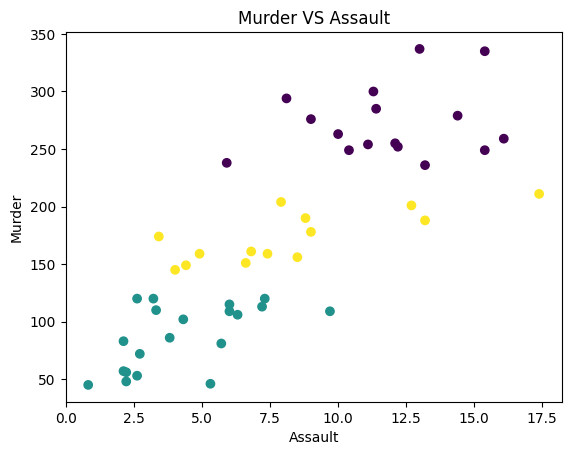

In [17]:
plt.scatter(x['Murder'],x['Assault'],c=cluster_labels)
plt.xlabel('Assault')
plt.ylabel('Murder')
plt.title('Murder VS Assault')
plt.show()

In [18]:
cluster_indices=np.where(cluster_labels==0)[0]

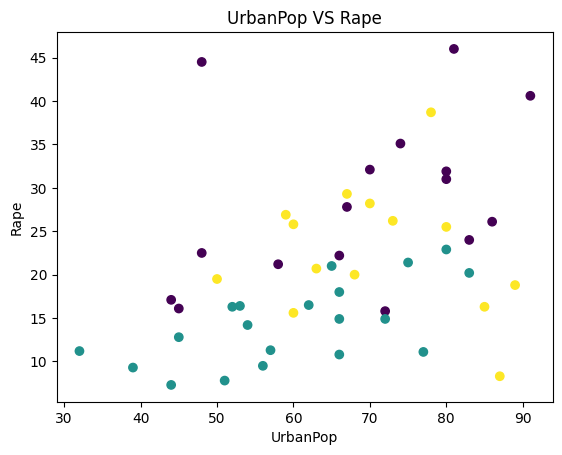

In [19]:
plt.scatter(x['UrbanPop'],x['Rape'],c=cluster_labels)
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.title('UrbanPop VS Rape')
plt.show()

In [20]:
data['Cluster_Labels']=cluster_labels

In [21]:
data

,Murder,Assault,UrbanPop,Rape,Cluster_Labels
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2


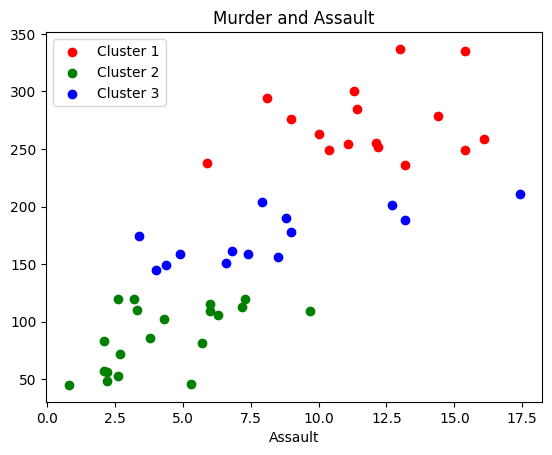

In [22]:
colors=['r','g','b','c','m']
for i in range(max(cluster_labels)+1):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Murder'],cluster_data['Assault'],c=colors[i],label=f'Cluster {i+1}')
  plt.xlabel('Murder')
  plt.xlabel('Assault')
  plt.title('Murder and Assault')
  plt.legend()

In [23]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [24]:
merging=linkage(x,method='ward')

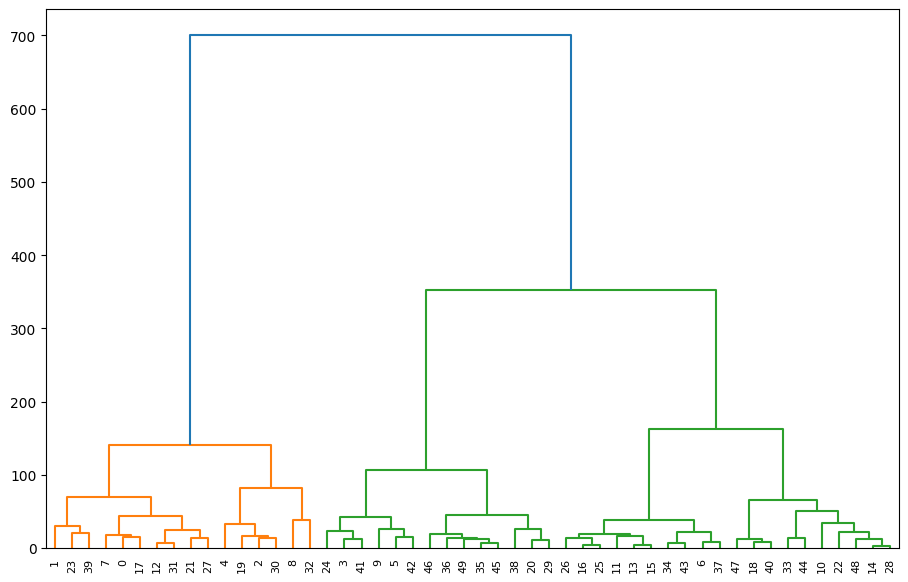

In [25]:
plt.figure(figsize=(11,7))
dendrogram(merging)
plt.show()

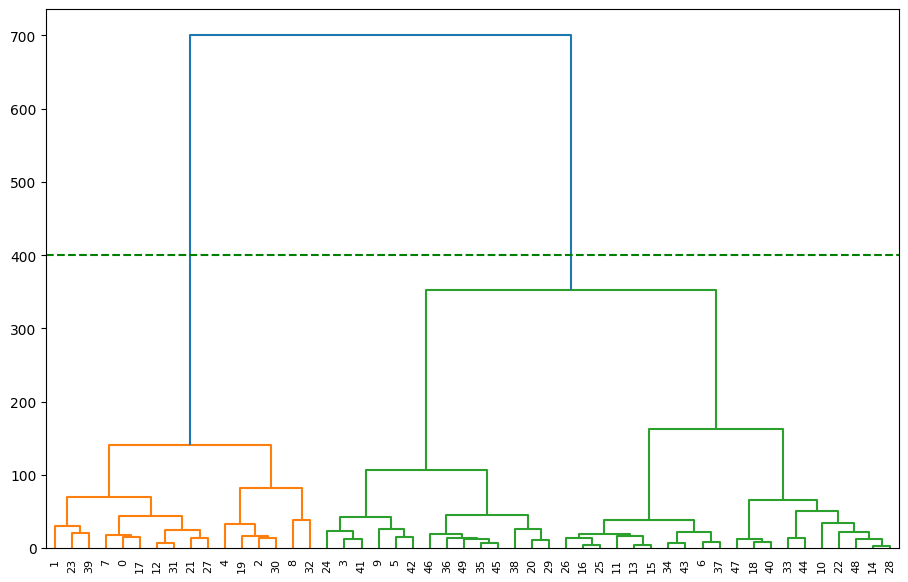

In [26]:
plt.figure(figsize=(11,7))
dendrogram(merging)
plt.axhline(400,color='green',linestyle='--')
plt.show()

In [27]:
cluster_labels=fcluster(merging,400,criterion='distance')

In [28]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

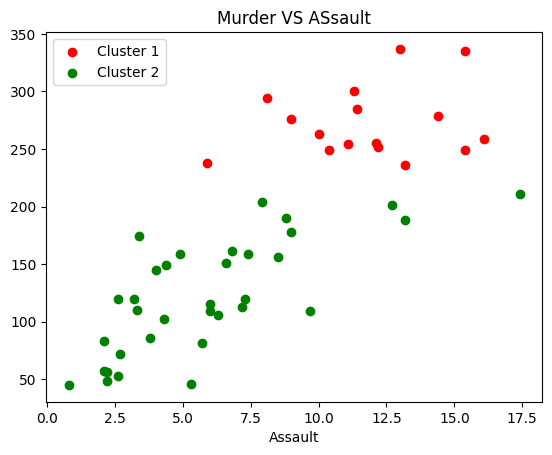

In [29]:
colors=['r','g']
for i in range(1,max(cluster_labels)+1):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Murder'],cluster_data['Assault'],c=colors[i-1],label=f'Cluster {i}')
plt.xlabel('Murder')
plt.xlabel('Assault')
plt.title('Murder VS ASsault')
plt.legend()

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_avg1=silhouette_score(x,cluster_labels)
print(silhouette_avg1)

0.576270501827592
